# Data Exploration

Simple manipulation with finger matrix sensors worn by human.

Sensors: 2A, 2B with cutout slits. 2B with one line (probs middle row B?) destroyed in the process.

Arduino code: matrix_readout.ino

#### // Settings

uint8_t delay1 = 1;

uint8_t delay2 = 1; 

uint8_t delay3 = 0;

static const uint16_t MAX_READS = 1000;

In [1]:
# Library imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [5]:
import sys  
sys.path.insert(0, '/home/zotac5/dev/hand_v11/src/festo_phand/festo_pressure_sensors/sensor_evaluation')
import sensor_evaluation

## Import of plotting functions
Plotting functions are saved in a separate python file for notebook readibility

In [10]:
# Dirty way to import all functions in Jupyter
from src.sensor_evaluation.plot_functions import *
from src.sensor_evaluation.helpers import *

In [11]:
# Load data from .csv file
DATA_FOLDER = '../data/manip/'
DATA_SAMPLE = 'HEx01.csv'

df, sample_name = get_sample(DATA_SAMPLE, DATA_FOLDER, matrix_count=2)

In [12]:
data_labels = ['A1','A2','A3','B1','B2','B3','C1','C2','C3',
              '2-A1','2-A2','2-A3','2-B1','2-B2','2-B3','2-C1','2-C2','2-C3',]

In [13]:
df['label'] = 0

In [14]:
df.head()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,2-A1,2-A2,2-A3,2-B1,2-B2,2-B3,2-C1,2-C2,2-C3,label
0,1,0,4,1,1,1,0,1,4,0,7,1,0,0,0,0,3,0,0
1,2,2,4,0,1,0,1,1,4,0,7,0,0,0,0,0,4,1,0
2,1,1,3,1,0,1,2,1,4,0,7,0,0,0,0,0,2,0,0
3,1,2,3,0,0,1,2,1,4,0,7,1,0,0,0,0,4,0,0
4,1,1,2,0,0,2,3,1,3,0,7,1,0,0,0,0,2,0,0


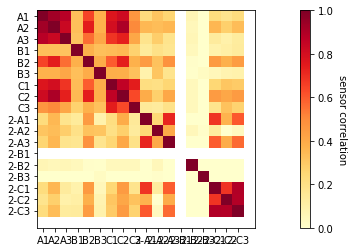

In [23]:
#correlation of sensors
full_corr = df.iloc[:,:].corr()
corr_m0 = df.iloc[:,0:9].corr()
corr_m1 = df.iloc[:,9:18].corr()
corr_m0m1 = df.corr().iloc[0:9,9:18]

#Define the correlation being mapped
corr = full_corr

# Plot the heatmap
fig, ax = plt.subplots(figsize=(16, 4))
im = ax.imshow(corr, cmap="YlOrRd", vmin=0, vmax=1)  # cmap="Wistia"

rows = data_labels
columns = data_labels
# rows = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']
# columns = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']

# Create colorbar
cbar_kw = {}
cbarlabel = "sensor correlation"
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(rows)))
# ... and label them with the respective list entries
ax.set_xticklabels(columns)
ax.set_yticklabels(rows)

plt.show()

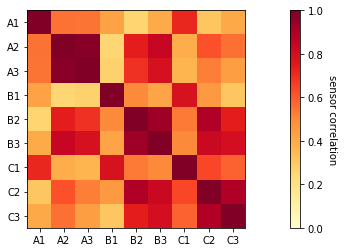

In [35]:
#get dataset
DATA_FOLDER = '../data/manip/'
DATA_SAMPLE = 'HGH01.csv'
df, sample_name = get_sample(DATA_SAMPLE, DATA_FOLDER, matrix_count=2)

#correlation of sensors
full_corr = df.iloc[:,:].corr()
corr_m0 = df.iloc[:,0:9].corr()
corr_m1 = df.iloc[:,9:18].corr()
corr_m0m1 = df.corr().iloc[0:9,9:18]

#Define the correlation being mapped
corr = corr_m1

# Plot the heatmap
fig, ax = plt.subplots(figsize=(16, 4))
im = ax.imshow(corr, cmap="YlOrRd", vmin=0, vmax=1)  # cmap="Wistia"

# rows = data_labels
# columns = data_labels
rows = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']
columns = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']

# Create colorbar
cbar_kw = {}
cbarlabel = "sensor correlation"
cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(rows)))
# ... and label them with the respective list entries
ax.set_xticklabels(columns)
ax.set_yticklabels(rows)

plt.show()

In [43]:
def time_plot3(df, sample_name, matrix_count=1):
    for m in range(0,matrix_count):
        # Initialise figure
        fig, ax = plt.subplots(figsize=(16, 4))
        ax.plot(df.iloc[:,m*9:(m+1)*9])

        # Define colour space for lines
        colourmap = plt.cm.gist_ncar
        plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 0.9, 9))))

        # Set up layout
        ax.set(xlabel='time steps',
               ylabel='signal (analog counts)',
               title='data sample: ' + sample_name + ' - matrix ID: 2' + chr(ord('@')+m+1))
        labels = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
        ax.legend(labels)
        ax.grid()

        #     fig.savefig("data/figures/"+sample_name+"_timeplot.png")
        plt.show()

    return

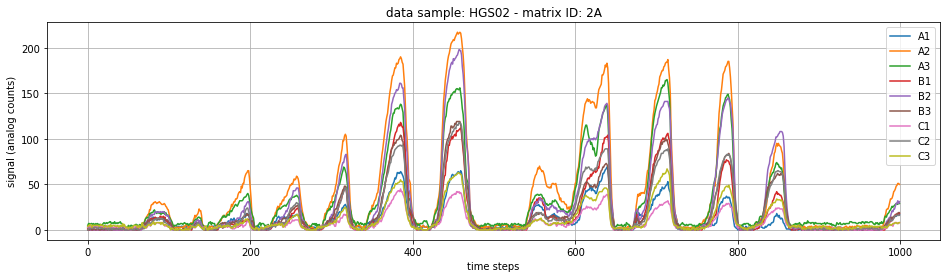

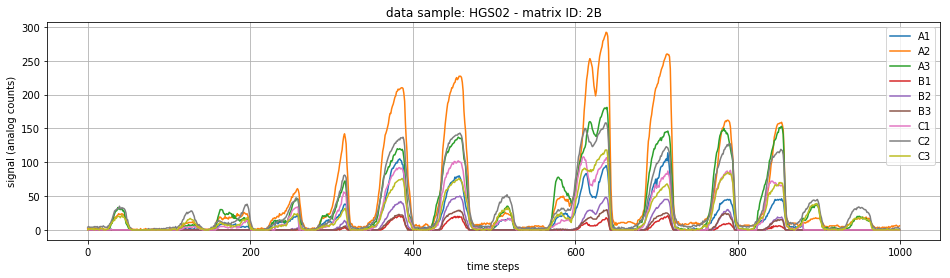

In [44]:
# Example of time plot
time_plot3(df, sample_name, 2)

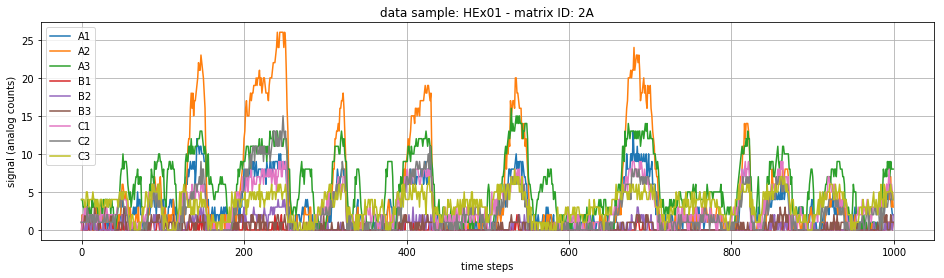

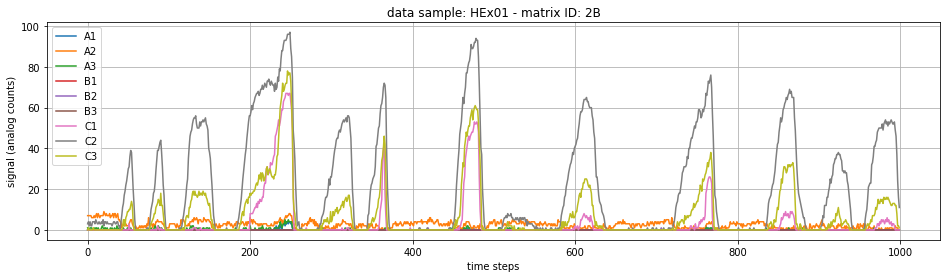

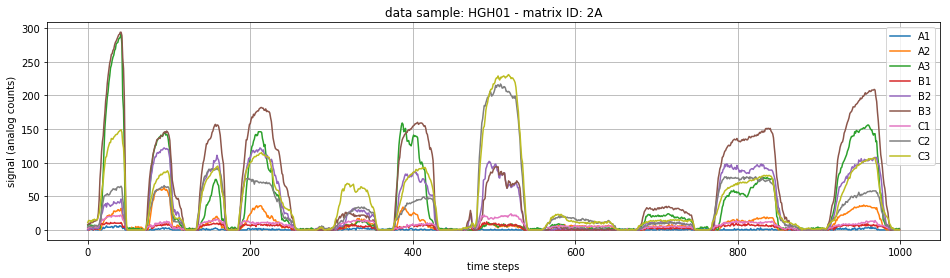

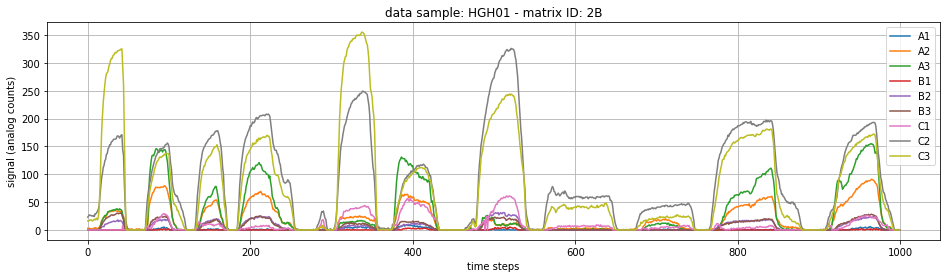

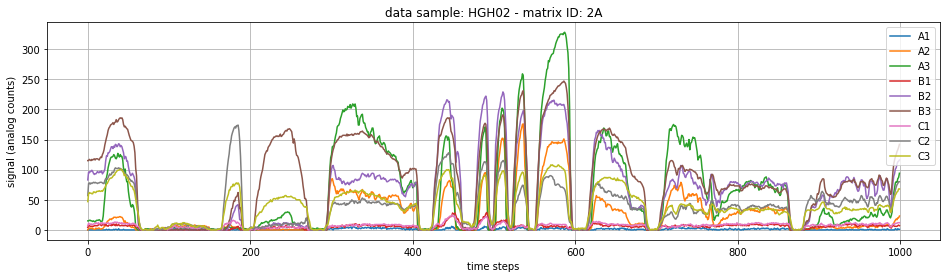

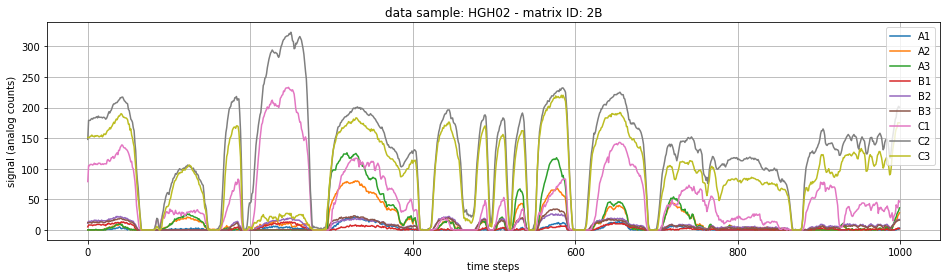

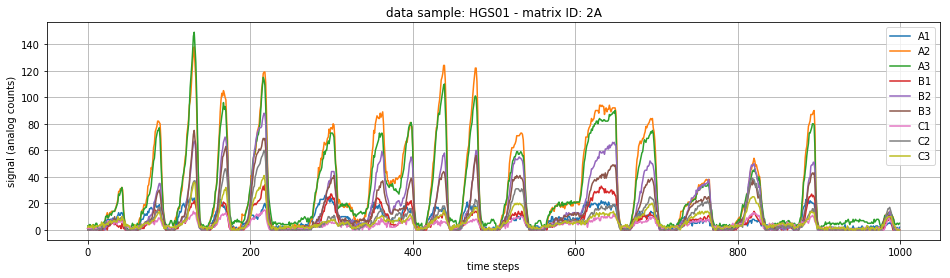

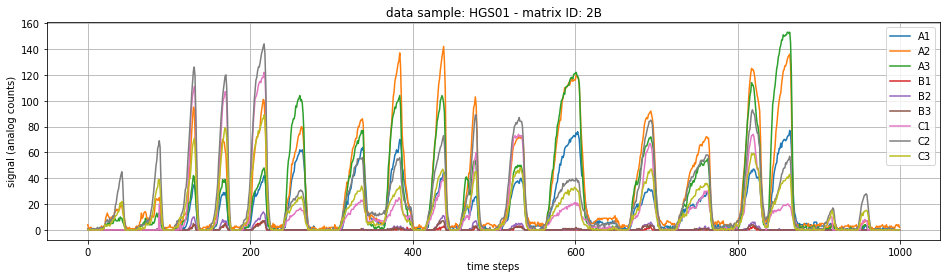

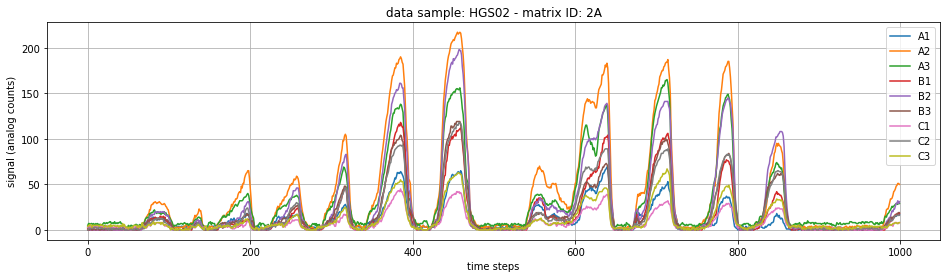

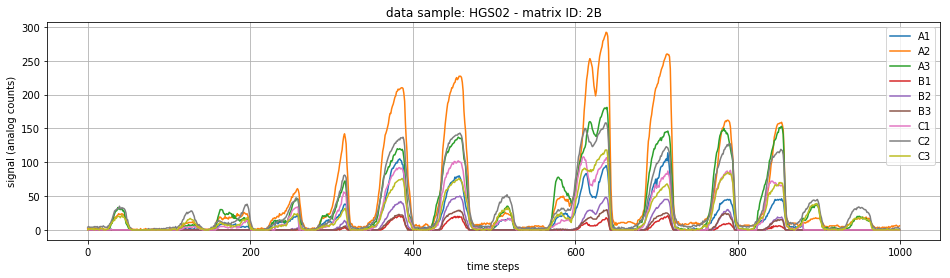

In [45]:
data_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv')]

# fig1, axs1 = plt.subplots(2, 3,figsize=(16,4))

for file in sorted(data_files):
    df, sample_name = get_sample(file, DATA_FOLDER, matrix_count=2)  
    time_plot3(df, sample_name, 2)

plt.show()    